#**GATHERING DATA**

In [31]:
import pandas as pd   #Library for manipualtion and filtering the data.
import numpy as np  #Library for scientific computing.
import matplotlib.pyplot as plt  #Library for Data visualization.
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [32]:
#Importing Insurance Dataset using read_csv in pandas.
df = pd.read_csv("insurance_data.csv", index_col = [0])

In [33]:
#"head()" used to get first 5 rows of dataset.
df.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
index,,,,,,,,,,
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [34]:
#Getting info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 115.2+ KB


In [35]:
#Counting column-wise null values
df.isnull().sum()

PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [36]:
#Percent column-wise null values
df.isnull().mean()*100

PatientID        0.000000
age              0.373134
gender           0.000000
bmi              0.000000
bloodpressure    0.000000
diabetic         0.000000
children         0.000000
smoker           0.000000
region           0.223881
claim            0.000000
dtype: float64

OBSERVATION
* There are two attributes have missing values
  * Age - 0.37% 
  * Region - 0.22%

CONCLUSION
* The Missing values are less than 1%, we can drop those values but for Data Analysis, we are replacing with desire value for using **missing value techniques** for better analysis.

In [37]:
#Getting the shape of dataset
df.shape
#It has 10 attributes and 1340 rows

(1340, 10)

In [38]:
#Extracting out the values count in columns using loop and "value_counts()".
column_value_count = ["gender", "children", "smoker", "region", "diabetic"]
for i in df[column_value_count]:
  print(df[i].value_counts())
  print("\n---------------------------------\n")

male      678
female    662
Name: gender, dtype: int64

---------------------------------

0    576
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

---------------------------------

No     1066
Yes     274
Name: smoker, dtype: int64

---------------------------------

southeast    443
northwest    349
southwest    314
northeast    231
Name: region, dtype: int64

---------------------------------

No     698
Yes    642
Name: diabetic, dtype: int64

---------------------------------



#**DATA PRE-PROCESSING**

In [39]:
#"describe()" used to give statistics for numerical parameteric column.
df.describe()

,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [40]:
#"nunique()" used to distinct values in each column in dataset.
df.nunique()

PatientID        1340
age                43
gender              2
bmi               275
bloodpressure      61
diabetic            2
children            6
smoker              2
region              4
claim            1337
dtype: int64

OBSERVATION :-
* There are some Numerical and some Categorical attributes 
  * Numerical attributes : PatientID, Age, BMI, Blood Pressure, Children and Claim.
  * Categorical attributes : Gender, Diabetic, Smoker and Region.

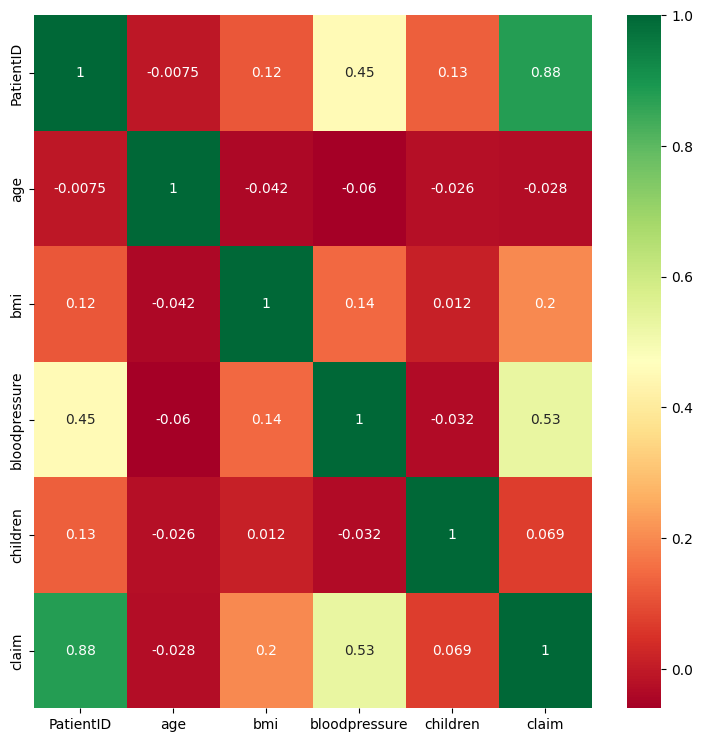

In [41]:
#Defining the correlation between the attributes.
corr_df = df.corr()
top_corr_fig = corr_df.index
plt.figure(figsize=(9,9))
sns.heatmap(df[top_corr_fig].corr(), annot=True, cmap ="RdYlGn")
plt.show()

OBSERVATION :-
* Claim and PatientID go the highest correlation(0.88), followed by Blood pressure(0.53) & BMI(0.2).

#**FEATURE ENGINEERING**

* We can fill those missing values with Missing Values techniques.
* There are some outliers which we can replace with desired value.
* For complete Feature Engineering, we have performed following task.
  * Handling Missing Values
  * Handling Outliers

#####Column : BMI

Before Removing Outliers skewness of BMI :  0.28597245020808587 



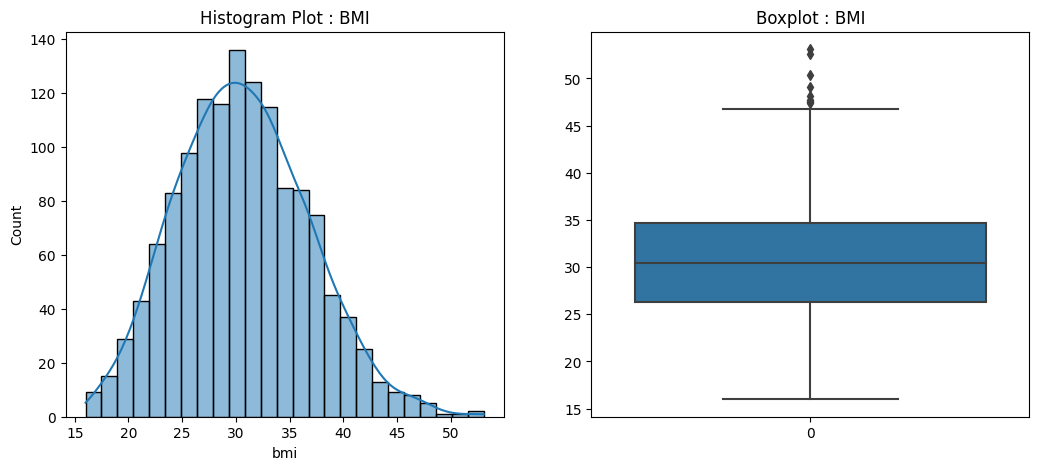

In [42]:
#Skewness of BMI
print("Before Removing Outliers skewness of BMI : ", df["bmi"].skew(),"\n")

#Plotting the BMI
plt.figure(figsize=(26,5))

#First Plot : Histogram --> BMI
plt.subplot(1,4,1)
sns.histplot((df["bmi"]), kde = True)
plt.title("Histogram Plot : BMI")

#Second Plot : Boxplot --> BMI
plt.subplot(1,4,2)
sns.boxplot(df["bmi"])
plt.title("Boxplot : BMI")
plt.show()

OBSERAVTION :-
* Skewness of BMI is 0.28
* There are some outliers too.

Total rows removed : 9 

After Removing Outliers :  0.1617930296259756 



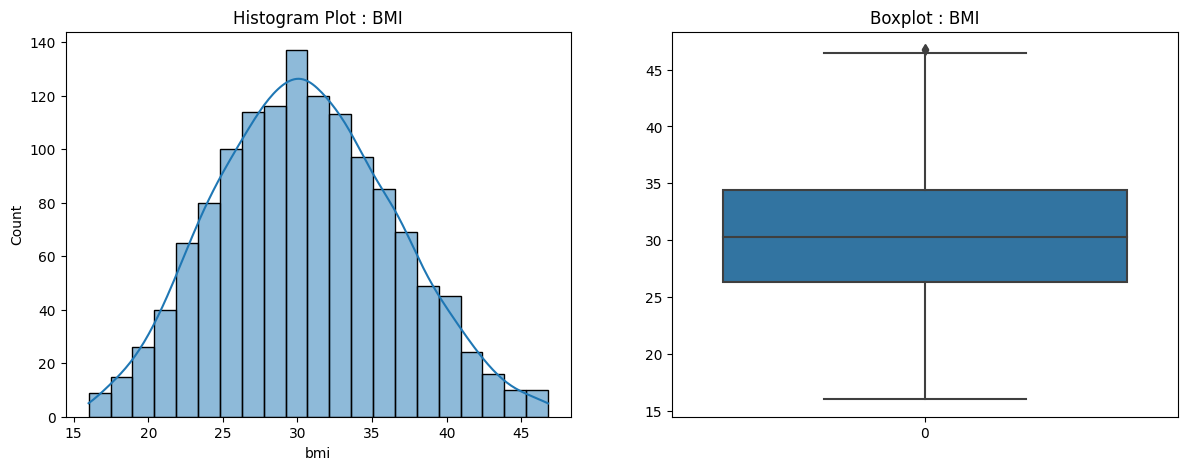

In [43]:
q3 = df["bmi"].quantile(0.75)
q1 = df["bmi"].quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

#Replacing outliers with NAN value.
outier_bmi = 0
for i in df["bmi"]:
  if i > upper:
    outier_bmi+=1
    df["bmi"].replace(i,np.nan, inplace = True)
print("Total rows removed :",outier_bmi,"\n")

#As the data is skewed, we will replace NAN value with Median value.
df["bmi"].fillna(df["bmi"].median(), inplace= True)

print("After Removing Outliers : ", df["bmi"].skew(),"\n")


plt.figure(figsize=(30,5))
plt.subplot(1,4,1)
sns.histplot((df["bmi"]), kde = True)
plt.title("Histogram Plot : BMI")

plt.subplot(1,4,2)
sns.boxplot(df["bmi"])
plt.title("Boxplot : BMI")
plt.show()

OBSERVATION :-
* Before skewness of BMI was 0.28 and after 0.16
* There are 9 outliers & Replaced with --> Median. 

#####Column : Age

Before Removing Outliers Skewness of Age :  0.11361133741072633 



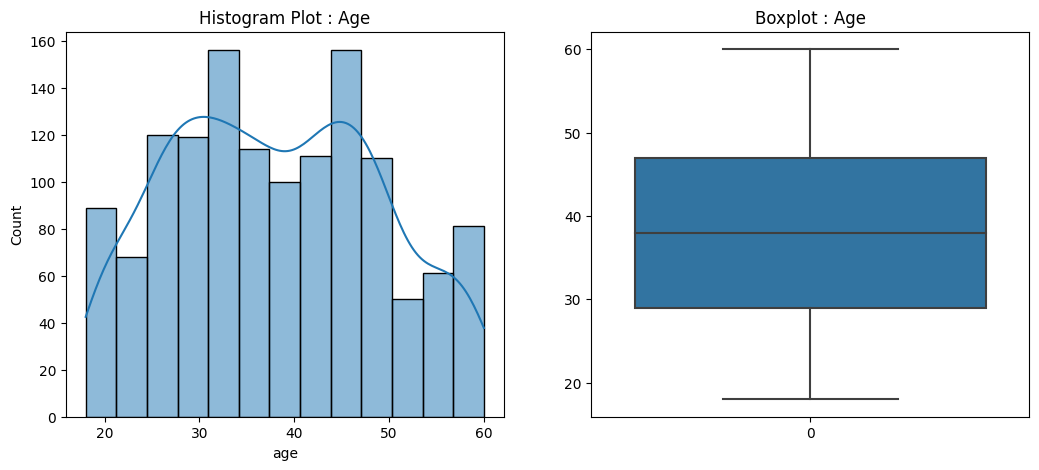

In [44]:
#Skewness of Age
print("Before Removing Outliers Skewness of Age : ", df["age"].skew(),"\n")

#Plotting --> Age 
plt.figure(figsize=(26,5))
plt.subplot(1,4,1)
sns.histplot((df["age"]), kde = True)
plt.title("Histogram Plot : Age")

plt.subplot(1,4,2)
sns.boxplot(df["age"])
plt.title("Boxplot : Age")
plt.show()

OBSERVATION :-
* Skewness of Age is 0.11
* No Outliers found

In [45]:
#Filling Null values with Median
df["age"].fillna(df["age"].median(), inplace = True)

#After fillna, skewness --> Age
print("\nAfter Fillna, skewness of Age : ", df["age"].skew())


After Fillna, skewness of Age :  0.11390294679791582


#####Column : Blood Pressure

Before Removing Outliers, skewness of Blood Pressure :  1.4835342102293079 



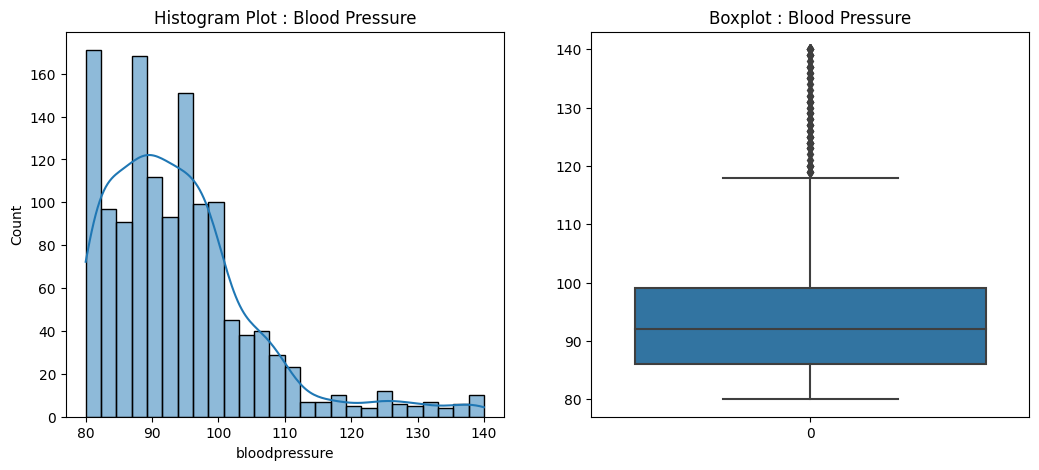

In [46]:
#Skewness of Blood Pressure
print("Before Removing Outliers, skewness of Blood Pressure : ", df["bloodpressure"].skew(),"\n")

#Pltting --> Blood Pressure
plt.figure(figsize=(26,5))
plt.subplot(1,4,1)
sns.histplot((df["bloodpressure"]), kde = True)
plt.title("Histogram Plot : Blood Pressure")

plt.subplot(1,4,2)
sns.boxplot(df["bloodpressure"])
plt.title("Boxplot : Blood Pressure")
plt.show()

OBSERVATION :-
* Skewness of Blood Pressure is 1.48
* There are Many outliers in this column.

Total rows removed : 62 

After Removing Outliers, skewness of blood pressure :  0.5521760044596141 



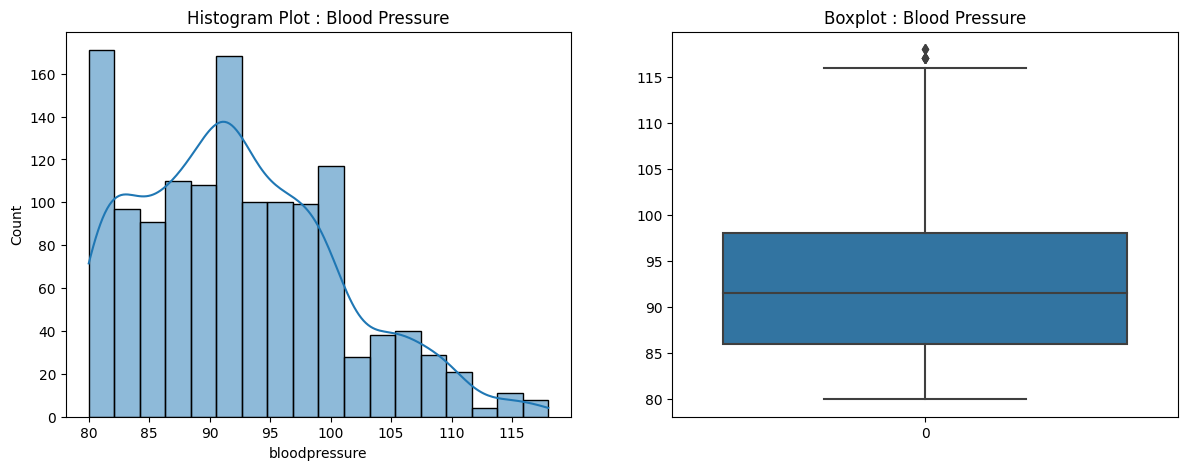

In [47]:
#Calculating IQR
q3_bp = df["bloodpressure"].quantile(0.75)
q1_bp = df["bloodpressure"].quantile(0.25)
iqr_bp = q3_bp - q1_bp
upper_bp = q3_bp + (1.5*iqr_bp)
lower_bp = q1_bp - (1.5*iqr_bp)

#Replacing outliers with NAN value.
outier_bp = 0
for i in df["bloodpressure"]:
  if i > upper_bp:
    outier_bp+=1
    df["bloodpressure"].replace(i,np.nan, inplace = True)
print("Total rows removed :",outier_bp,"\n")

#Filling with Median value in --> Blood Pressure column
df["bloodpressure"].fillna(df["bloodpressure"].median(), inplace = True)

#Calculating Skewness again
print("After Removing Outliers, skewness of blood pressure : ", df["bloodpressure"].skew(),"\n")

#Plotting again --> Blood Pressure
plt.figure(figsize=(30,5))
plt.subplot(1,4,1)
sns.histplot((df["bloodpressure"]), kde = True)
plt.title("Histogram Plot : Blood Pressure")

plt.subplot(1,4,2)
sns.boxplot(df["bloodpressure"])
plt.title("Boxplot : Blood Pressure")
plt.show()

#####New Column : BMI Category

In [48]:
#Defining a new column BMI Category
def bmi_categories(value):
    if pd.isna(value):
        return np.nan
    
    if value < 18.5:
        return "underweight"
    elif value >= 18.5 and value < 25:
        return "normal"
    elif value >= 25 and value <= 30:
        return "overweight"
    elif value > 30:
        return "obesity"
    else:
        return value

#Now create the categories according to the values
df["bmi_cat"] = df["bmi"].apply(lambda x: bmi_categories(x)).copy()

OBSERVATION :-
* BMI Category are divided into 4 segments:-
  * **Underweight :** BMI < 18.5
  * **Normal :** 18.5 <= BMI < 25
  * **Overweight :** 25 <= BMI <=30
  * **Obesity :** BMI > 30

#####New Column : Age Group

In [49]:
#Defining a new column Age Group
def age_group(value):
    if pd.isna(value):
        return np.nan
    
    if value < 17:
        return "Child"
    elif value >= 17 and value <= 30:
        return "Young Adult"
    elif value > 30 and value <= 45:
        return "Middle Aged Adult"
    elif value > 45:
        return "Old Adult"
    else:
        return value

#Now create the categories according to the values
df["Age_Grp"] = df["age"].apply(lambda x: age_group(x)).copy()

OBSERVATION :-
* Age groups are divided into 4 segments :-
  * **Child :** Age < 17
  * **Young Adult :** 17 <= Age <= 30
  * **Middle Aged Adult :** 30 <= Age <=45
  * **Old Adult :** Age > 45

#**EXPLORATORY DATA ANALYSIS**

#####Univariate Analysis

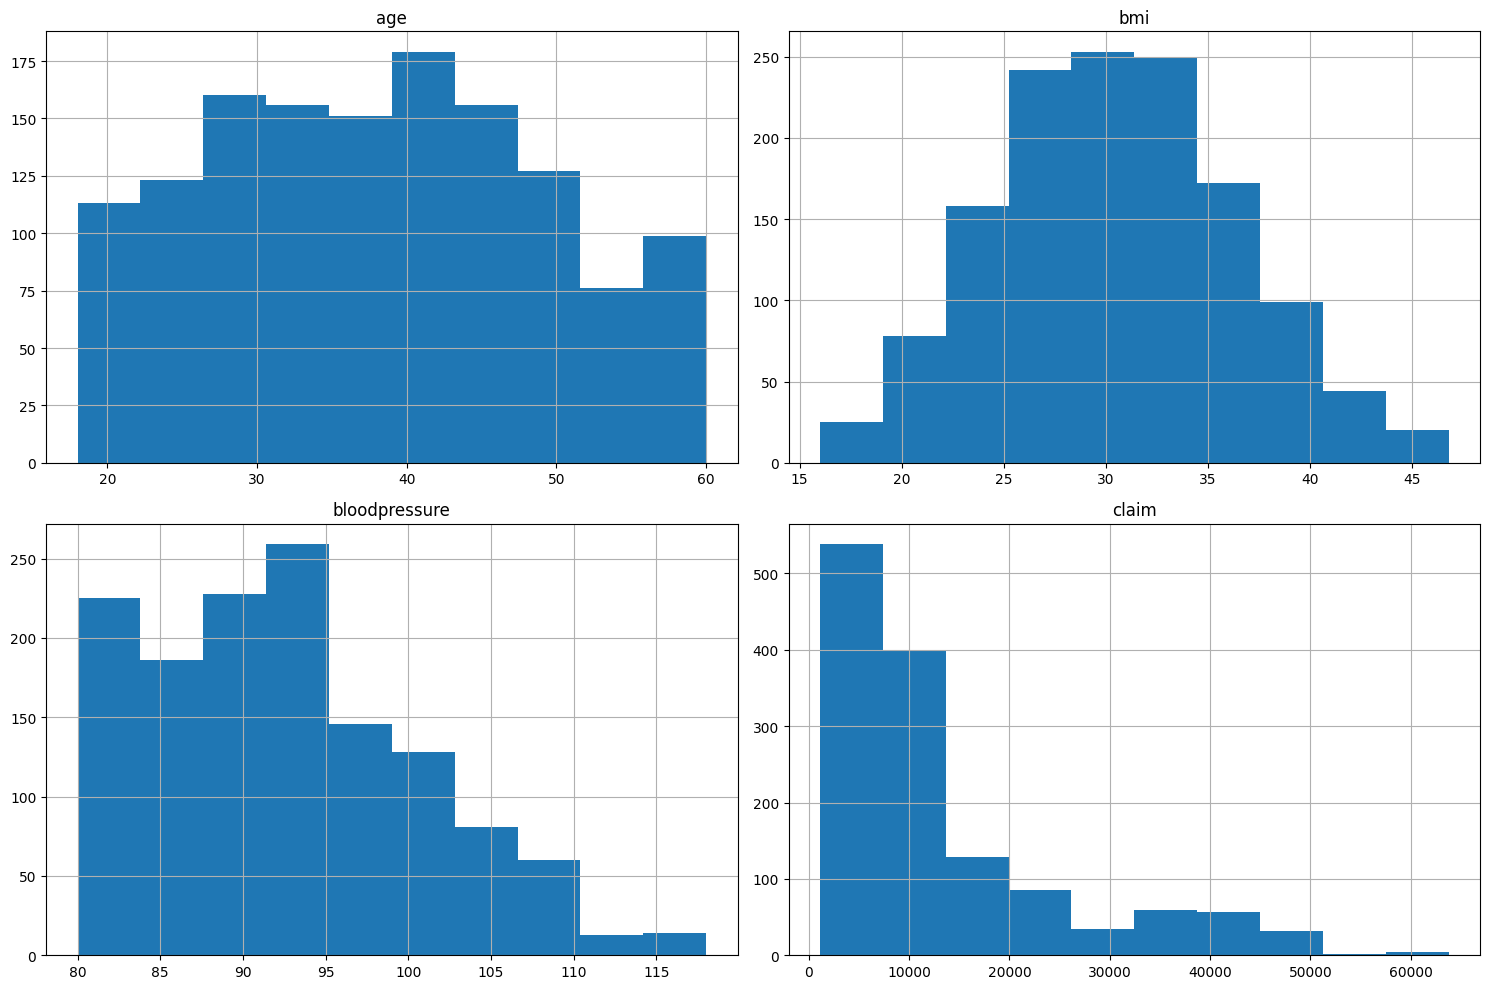

In [50]:
#Plotting all numerical attributes
plot_columns = ['age', 'bmi', 'bloodpressure','claim'] 
df[plot_columns].hist(figsize=(15, 10))

#tight_layout - automatically adjust the spacing between subplots in a figure to prevent overlapping or excessive white space.
plt.tight_layout()
plt.show()

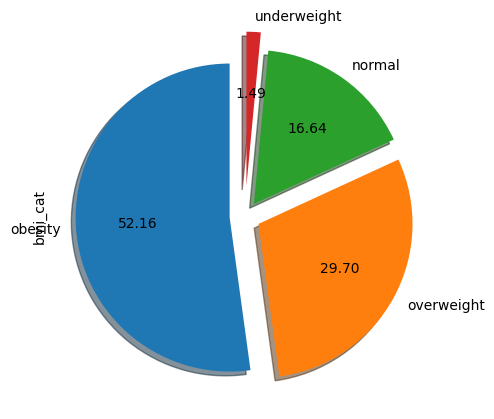

In [51]:
#Plotting BMI Category using Pie Chart
df["bmi_cat"].value_counts().plot.pie(startangle = 90, shadow = True, explode=(0.1, 0.1, 0.1, 0.2), figsize=(5, 5), autopct='%.2f')
plt.show()

**OBSERVATION :-**
* Percentage of "Obese" are high among all categories, followed by "Overweight".
  * Obese : 52.16%  
  * Overweight : 29.7%
  * Normal : 16.64%
  * Underweight : 1.49% 
  

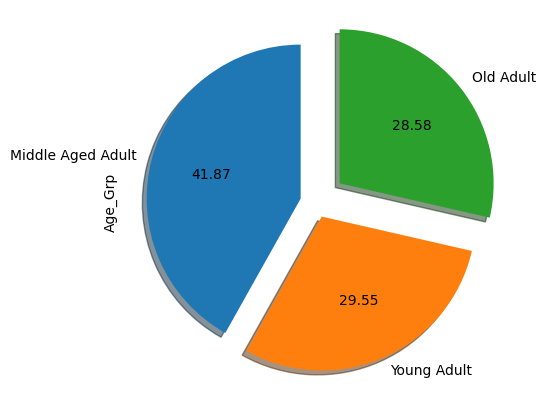

In [52]:
#Plotting Age Group using Pie Chart
df["Age_Grp"].value_counts().plot.pie(startangle = 90, shadow = True, explode=(0.1, 0.1, 0.2), figsize=(5, 5), autopct='%.2f')
plt.show()

**OBSERVATION :-**
* * Percentage of "Middle Aged Adult" are high among all categories.
  * Young Adult : 29.55% 
  * Middle Aged Adult : 41.87%  
  * Old Adult : 28.58%


#####Bivariate Analysis

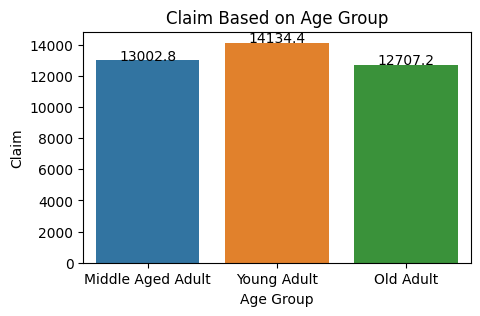

In [53]:
#Plotting Claim vs Age Group
plt.figure(figsize=(5,3))
plt1 = sns.barplot(data=df, y="claim", x="Age_Grp", ci = None) 

#Labelling code
for i in plt1.patches:
    percentage = '{:.1f}'.format(i.get_height())
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    plt1.annotate(percentage, (x, y), ha='center')

plt.title("Claim Based on Age Group")
plt.ylabel("Claim")
plt.xlabel("Age Group")
plt.show()

OBSERVATION
* Young Adults (17,30) --> 14.13K
* Old and Middle Aged Adults --> claim around 13K

Mean of claim by the Age are :
 age
(15, 25]    13933.245556
(25, 35]    13075.977669
(35, 45]    13661.579783
(45, 55]    12541.543732
(55, 65]    13182.417172
Name: claim, dtype: float64 



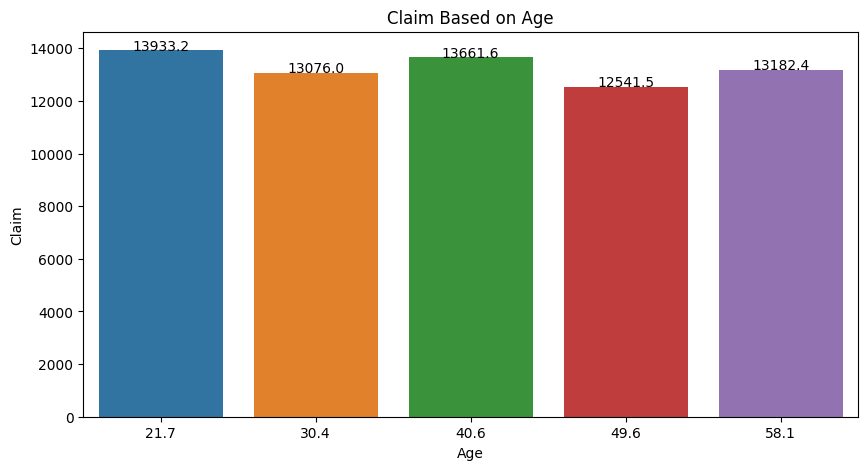

In [54]:
#Cutting the age by ranges from 0 to 60 and getting the average claim based on the range of age.
age_cut = pd.cut(df["age"], bins = list(np.arange(15,66,10)))
print("Mean of claim by the Age are :\n",df.groupby(age_cut)["claim"].mean(),"\n")

#Ploting the above code in Barchart for better understanding.
cat2 = round(df[['age',"claim"]].groupby(pd.cut(df["age"], bins = list(np.arange(15,66,10))), as_index=False).mean(),1)
plt.figure(figsize =(10,5))
ax = sns.barplot(x = "age", y = "claim", data = cat2)

#Labeling code
for i in ax.patches:
    percentage = '{:.1f}'.format(i.get_height())
    x = i.get_x()+ i.get_width()/2
    y = i.get_height()+5
    ax.annotate(percentage, (x, y), ha='center')

plt.title("Claim Based on Age")
plt.xlabel("Age")
plt.ylabel("Claim")
plt.show()

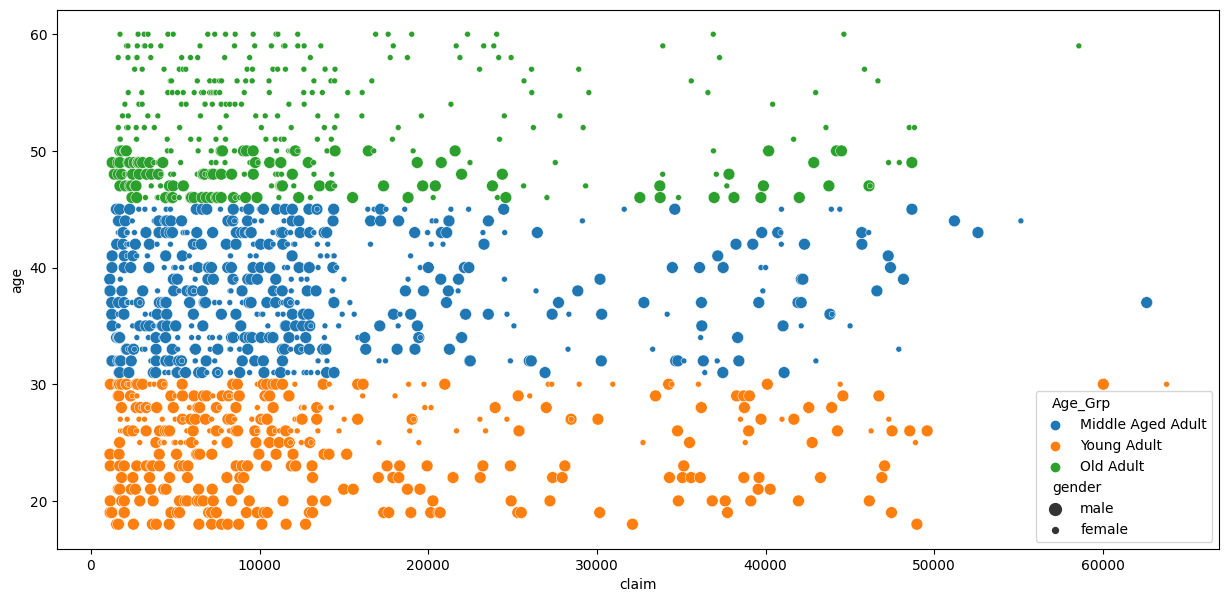

In [55]:
#Plotting Claim vs Age and differentiating with Age Group and Gender 
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x="claim", y="age", hue="Age_Grp", size="gender") 
plt.show()

**OBSERVATION :-**
* Claim between 0 to 15K is more by all the Age group.
* Male : Age (15 to 25) are 100% and claim 13.94K
* Female : Age (50 to 60) are 100% and claim 18.6K.

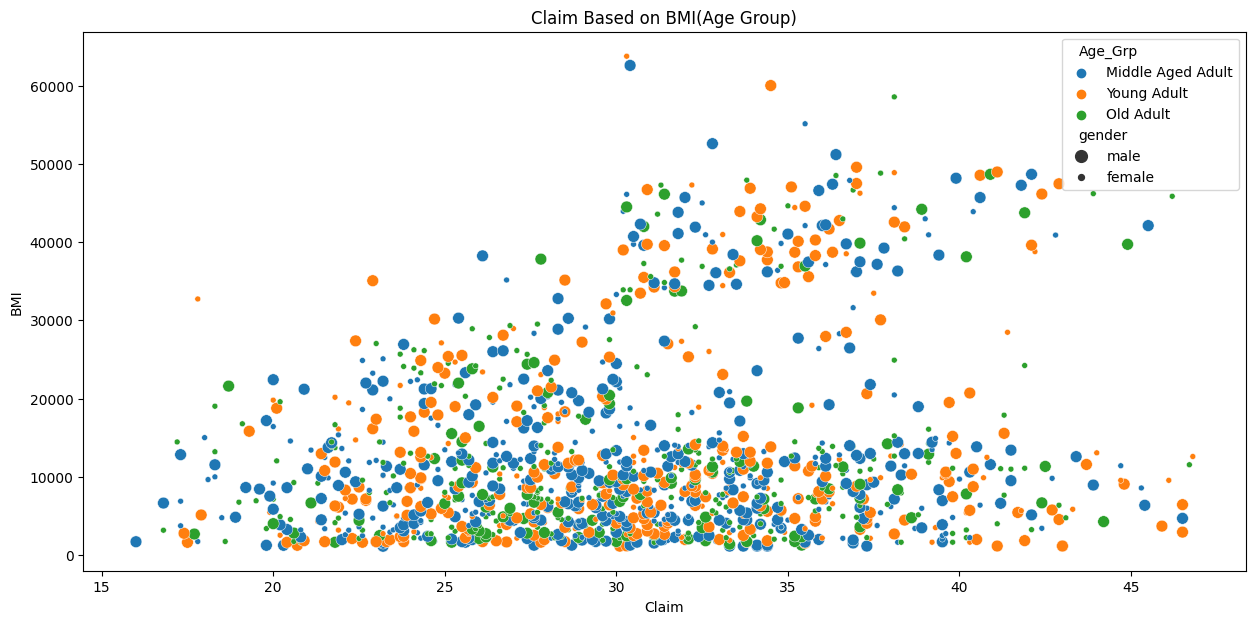

In [56]:
#Plotting Claim vs BMI and differentiating with Age Group and Gender 
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x="bmi", y="claim", hue="Age_Grp", size = "gender")
plt.title("Claim Based on BMI(Age Group)")
plt.xlabel("Claim")
plt.ylabel("BMI")
plt.show()

**OBSERVATION :-**
* Claim between 0 to 15K is more on all range of BMI Index and Gender.

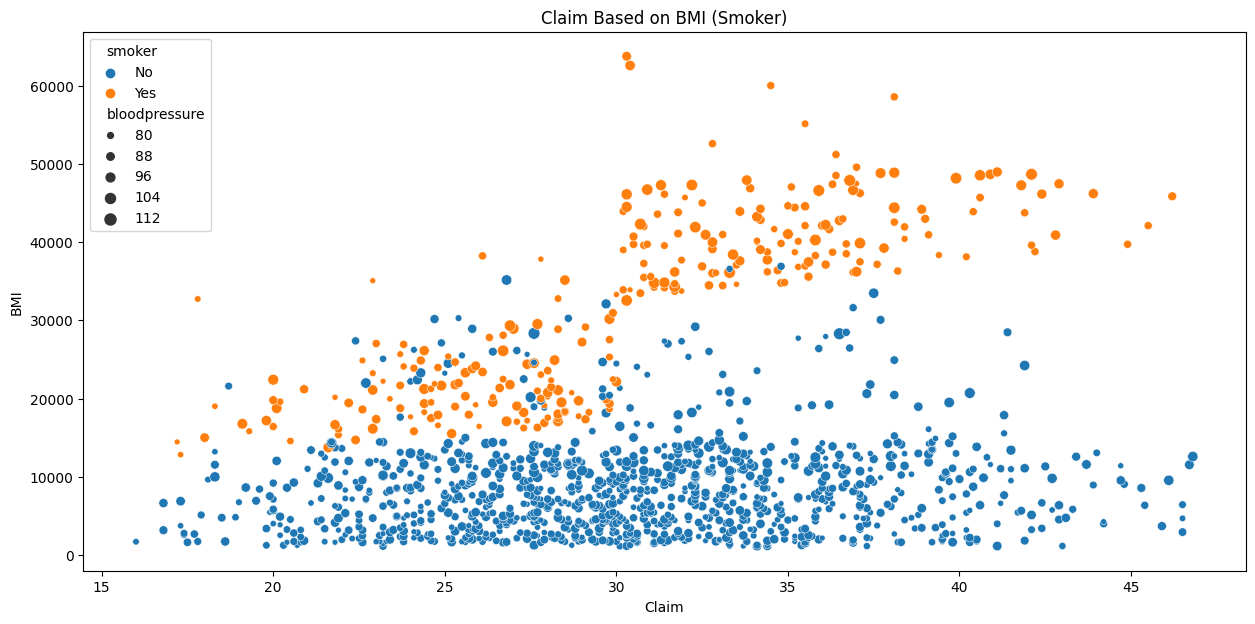

In [57]:
#Plotting Claim vs BMI and differentiating with Smoker and Blood Pressure 
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x="bmi", y="claim", hue="smoker", size = "bloodpressure")
plt.title("Claim Based on BMI (Smoker)")
plt.xlabel("Claim")
plt.ylabel("BMI")
plt.show()

**OBSERVATION :-**
* Non-Smoker claim less as compare to Smoker.
* Smoker with high blood pressure claim more as compare to Non-Smoke with high and low Blood Pressure.

#####Multivariate Analysis

In [58]:
#Seperating out Analysis Data into different column
column_eda = ["age", "bmi", "bloodpressure", "children", "claim", "bmi_cat"]

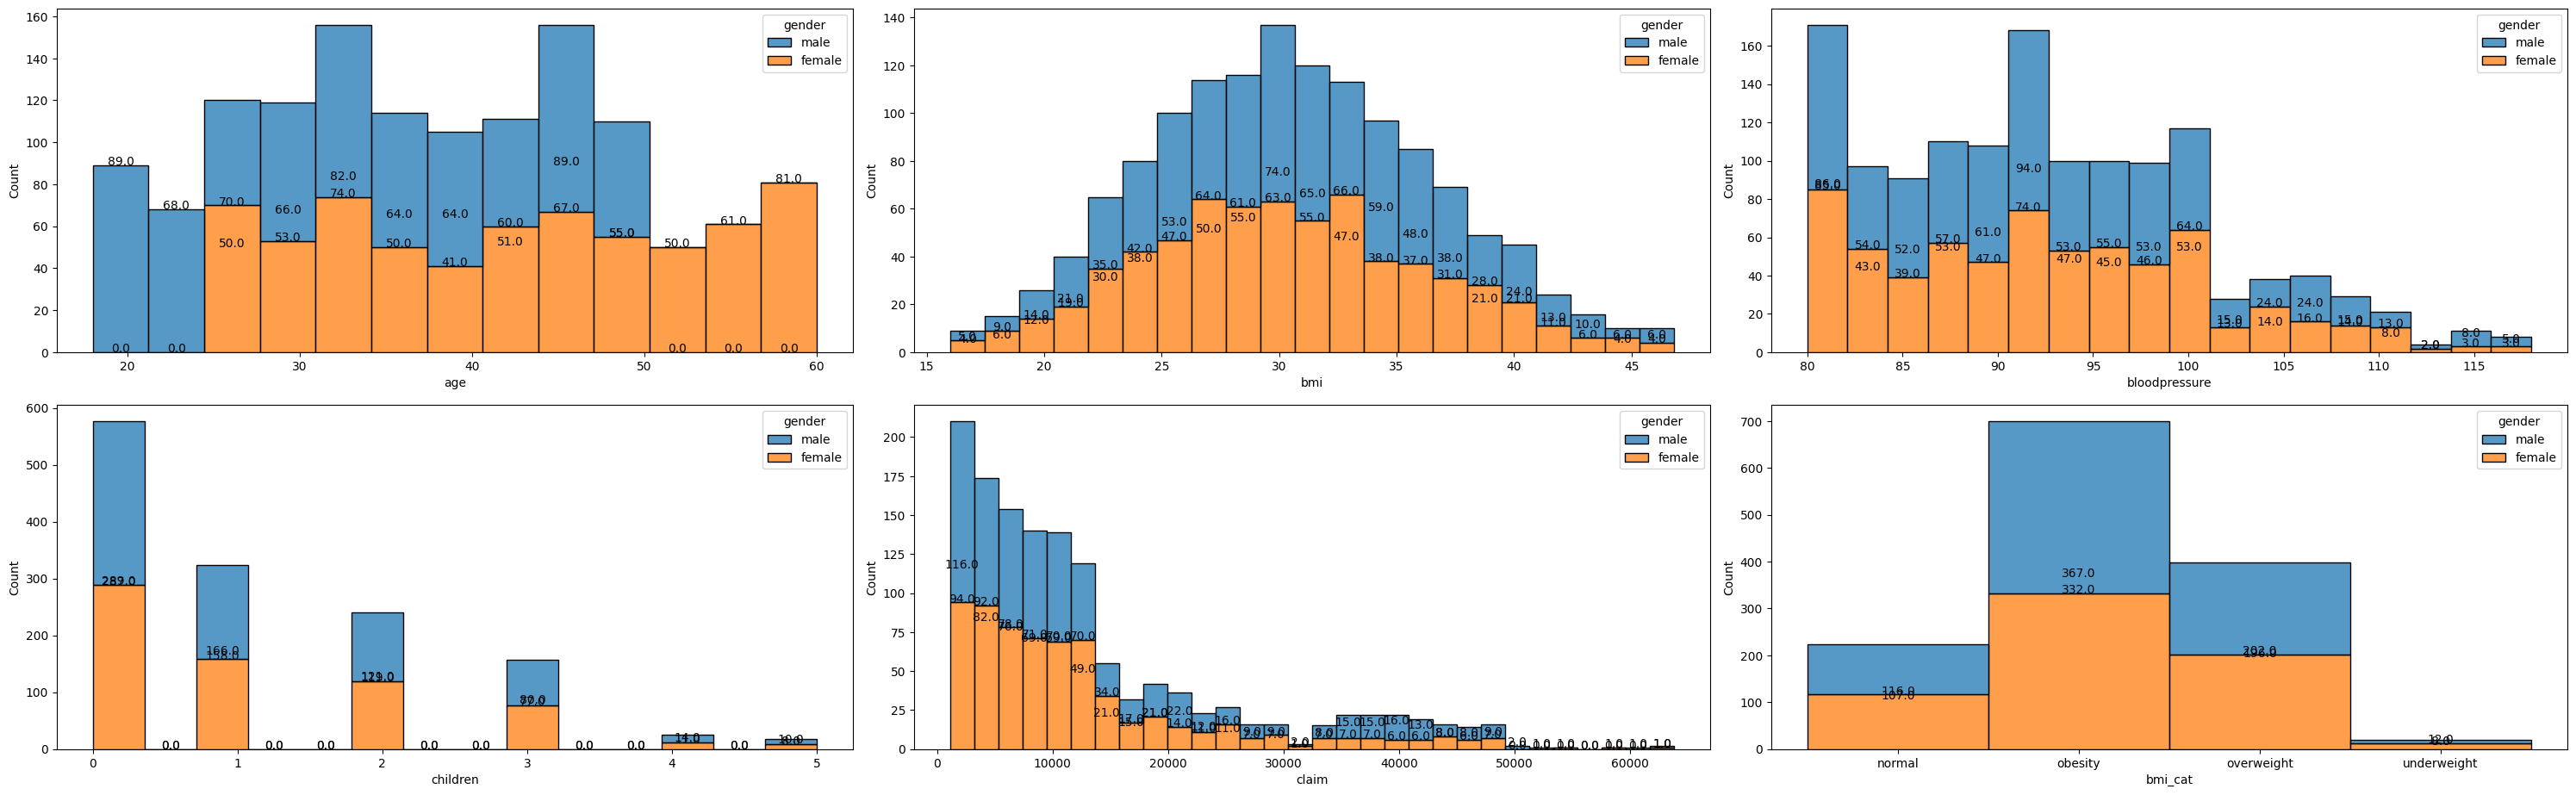

In [59]:
def numeric_based_on_gender(data):
  plt.figure(figsize = (30,230))
  l_row = 50
  l_pos = 1

  #Plotting all the attributes
  for col in column_eda:
    plt.subplot(l_row, 3, l_pos)
    ax = sns.histplot(data=df, x=col, hue="gender", multiple="stack")

    #Labelling Code
    for i in ax.patches:
      percentage = '{:.1f}'.format(i.get_height())
      x = i.get_x()+ i.get_width()/2
      y = i.get_height()
      ax.annotate(percentage, (x, y), ha='center')

    #Increment by 1  
    l_pos = l_pos + 1
  #tight_layout - automatically adjust the spacing between subplots in a figure to prevent overlapping or excessive white space.  
  plt.tight_layout()
  return(plt.show())

numeric_based_on_gender(df)

**OBSERVATION :-**
* People who have Age between 15 to 25 are 100% dominated Male and between 50 to 60 are 100% dominated Female.
* Both gender are almost equal in BMI Category and Obese people are high.


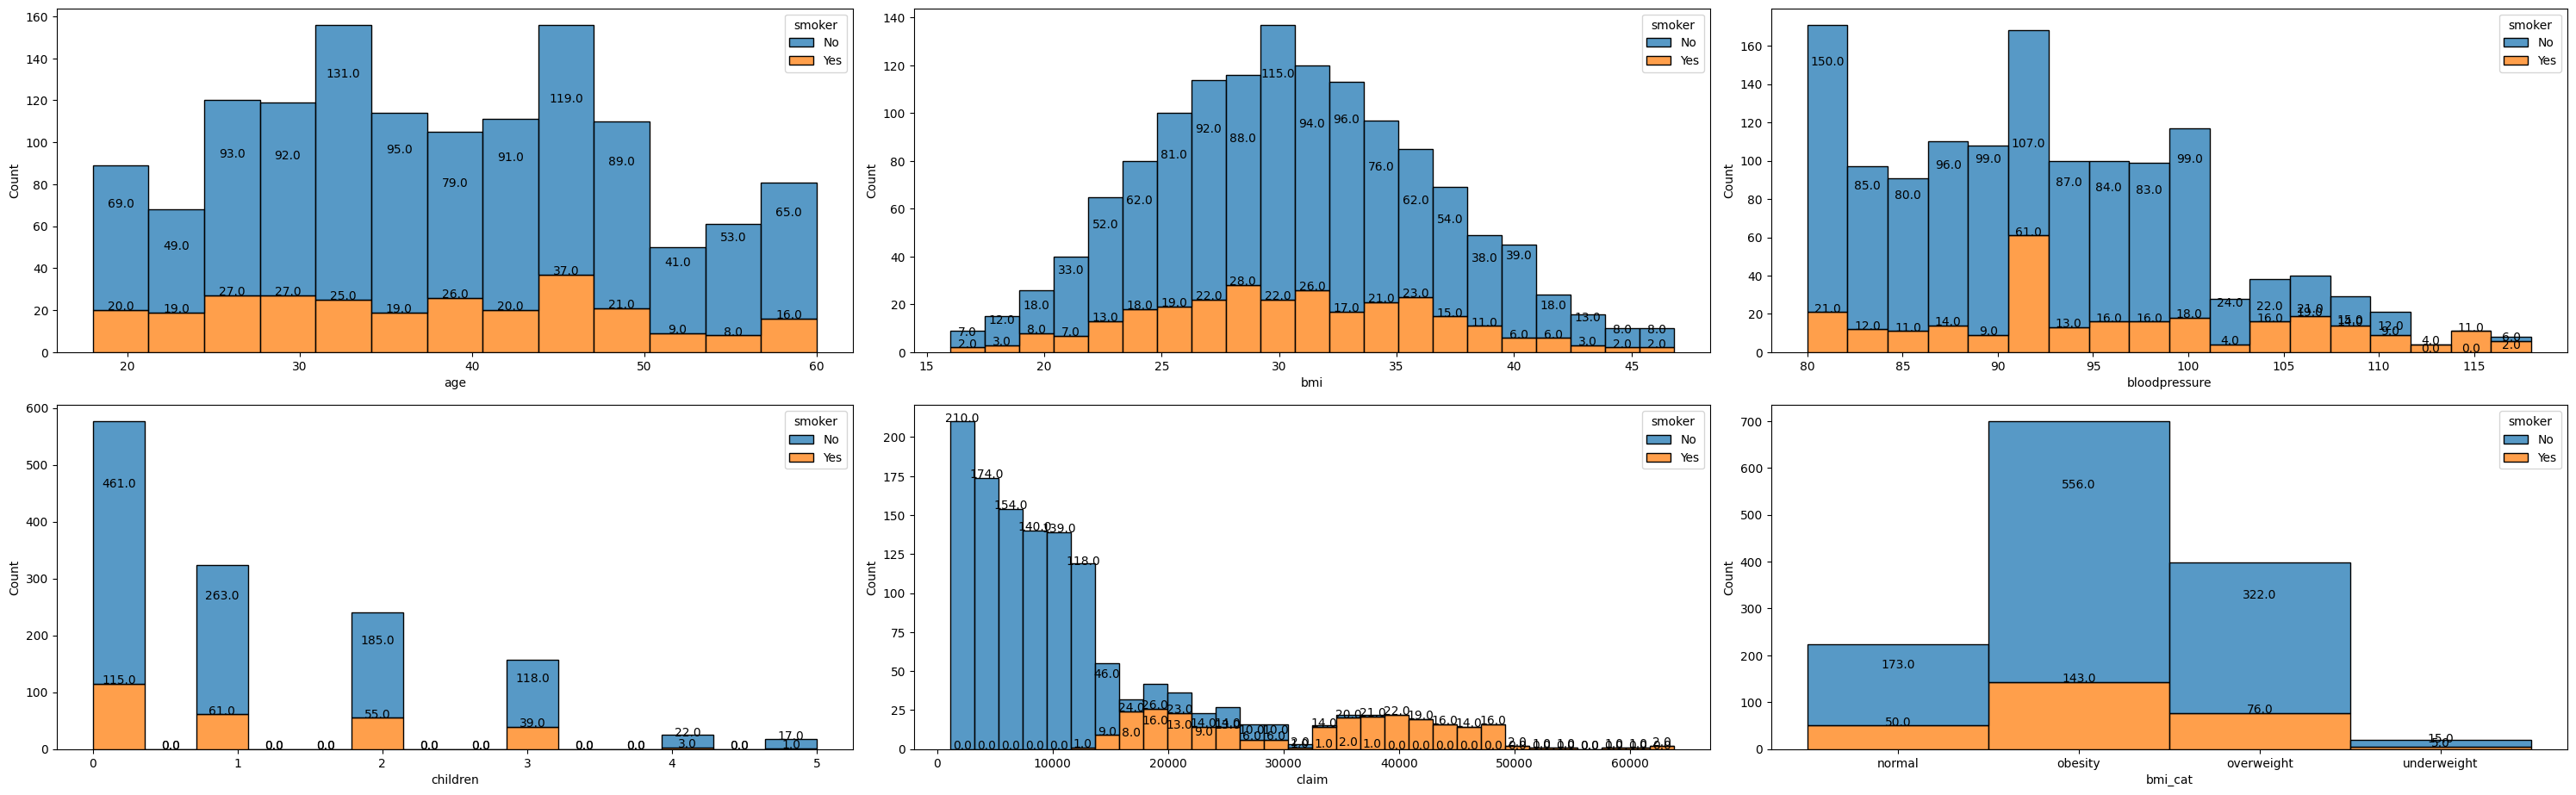

In [60]:
def numeric_based_on_smoker(data):
  plt.figure(figsize = (30,230))
  l_row = 50
  l_pos = 1

  #Plotting all the attributes
  for col in column_eda:
    plt.subplot(l_row, 3, l_pos)
    ax = sns.histplot(data=df, x=col, hue="smoker", multiple="stack")

    #Labelling Code
    for i in ax.patches:
      percentage = '{:.1f}'.format(i.get_height())
      x = i.get_x()+ i.get_width()/2
      y = i.get_height()
      ax.annotate(percentage, (x, y), ha='center')

    #Increment by 1  
    l_pos = l_pos + 1
  #tight_layout - automatically adjust the spacing between subplots in a figure to prevent overlapping or excessive white space.  
  plt.tight_layout()
  return(plt.show())

numeric_based_on_smoker(df)

**OBSERVATION :-**
* People are high in Obese and Overweight as compare to Normal and Underweight and 556 people who are Obese are Smoker and 141 are Non-Smoker.
* People who claims insurance with total amount between 0 to above 12000 is only dominated by 981 smoker.
* People who have BMI Index and Age is dominated with Non-Smoker by 290%.
* People who claims insurance with total amount between 32000 to above 50000 is only dominated by 144 Non-Smoker.
* People who have blood pressure between 80 to 110 is dominated with Non-Smoker.